In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import random

%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

### Create a fake dataset with Faker

In [2]:
from faker import Faker
fake = Faker()

#import a Provider
from faker.providers import BaseProvider

# create my new provider class
class MyProvider(BaseProvider):
    # define a method that return a random expense type
    def expenseType(self):
        foo = ['Food_Drink', 'Transportation', 'Clothes', 'Rent', 'Entertainment', 'Bills']
        return random.choice(foo)

# then add my new provider to faker instance
fake.add_provider(MyProvider)

In [3]:
def createFakeDataset(num_examples):
    """Function that creates a fake dataset using the python module Faker
    
    Args:
        num_examples (int): number of fake examples to generate

    Returns:
        pandas.core.frame.DataFrame: the final dataframe

    """
    
    l_dates = []
    l_cards = []
    l_types = []
    l_amounts = []
    
    for _ in range(num_examples):
        # create a fake date within a week
        l_dates.append(fake.date_time_between(start_date="-7d", end_date="now", tzinfo=None).date())
        # create a fake card number 
        l_cards.append(fake.credit_card_number())
        # create a fake expenseType
        l_types.append(fake.expenseType())
        # create a fake amount of money
        l_amounts.append(fake.random_int(min=0, max=1000))
        
    # create a dataframe    
    df = pd.DataFrame({'date': l_dates, 'card_number': l_cards, 'type': l_types, 'amount': l_amounts})
    # convert string to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    return df

In [7]:
data = createFakeDataset(10000)
data.head(10)

,amount,card_number,date,type
0,957,869927001678857,2017-07-14,Transportation
1,228,869912972864926,2017-07-11,Clothes
2,237,4520110166942,2017-07-12,Clothes
3,823,180009862522623,2017-07-09,Rent
4,537,4864202856402,2017-07-10,Food_Drink
5,559,503816013901,2017-07-11,Clothes
6,986,180039906683479,2017-07-12,Food_Drink
7,502,060454612973,2017-07-09,Clothes
8,103,6011737848584745,2017-07-10,Food_Drink
9,847,6011291294529093,2017-07-11,Bills


### Use unstack() to plot the number of daily transaction for each type of expense

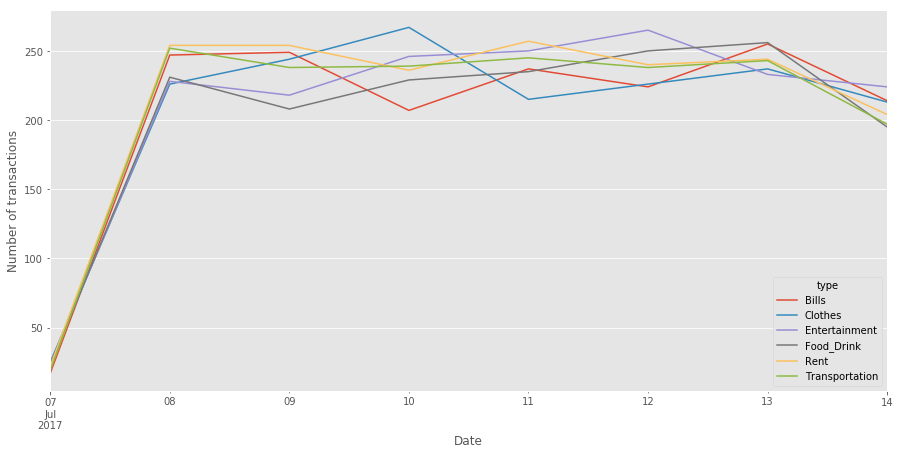

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of transactions')

### Use unstack() to plot the total amount of money spent each day for each type of expense

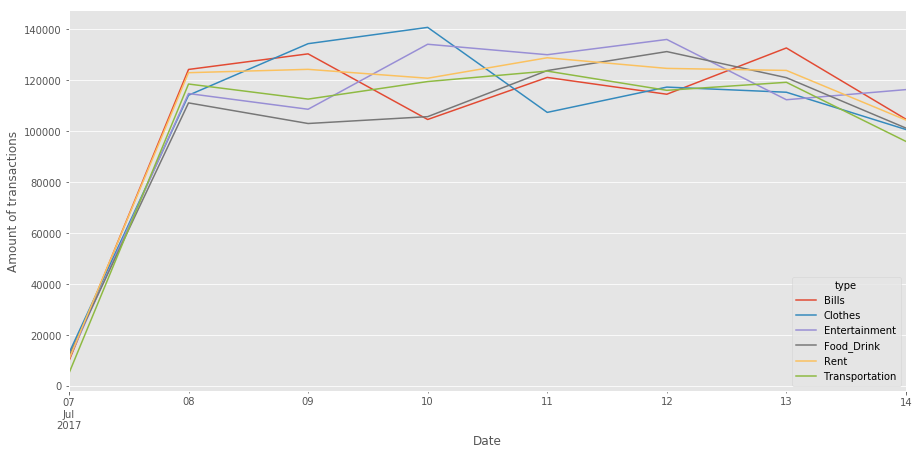

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['date','type']).sum()['amount'].unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Amount of transactions')